<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 1*

---

# Tree Based Model

## 🏆 학습목표

- 결정트리 모델의 장점을 이해하고 선형회귀모델과 비교할 수 있습니다.
- 결정트리의 **특성 중요도(feature importances)** 를 활용할 수 있습니다. 
- **앙상블 기법** 중 **bagging**의 특징을 이해할 수 있습니다.
- sklearn을 통해 **결정트리 (decision tree)** 와 **랜덤포레스트 (random forest)** 모델을 구현하고 문제에 적용할 수 있습니다.

### Warm up

결정트리에 대한 다음 동영상을 시청하세요!
- [StatQuest: Decision Trees](https://youtu.be/7VeUPuFGJHk)

결정트리를 생성할때 분기는 어떻게 정해질까요? Information Gain과 Gini Impurity 개념에 대해 다음 동영상을 시청하세요.
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

랜덤포레스트가 결정트리와 어떻게 다를까요?
- [StatQuest: Random Forests Part 1 - Building, Using and Evaluating](https://youtu.be/J4Wdy0Wc_xQ)

### 📚 아래 라이브러리를 설치해 주세요.

#### 이번 모듈에서 추가적으로 사용하는 라이브러리는 다음과 같습니다. 설치를 확인해 주세요.
- [**category_encoders**](https://contrib.scikit-learn.org/category_encoders/)
- [**pandas-profiling**](https://pandas-profiling.ydata.ai/docs/master/index.html)

In [ ]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 16.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=041d7e89c79bf5b1c54c34dfe640f1d0d3333f4e48a3376a6de77ebbeec6f1fd
  Stored in directory: /root/.cache/pip/whee

---

## 1. 결정 트리(Decision Tree)

Sprint1에서는 선형회귀모델을 배웠습니다. 선형회귀모델은 특성과 타겟의 관계를 선형적이라고 가정하고, 비용함수를 최소로하는 파라미터를 찾는 모델이었습니다.  
그 결과 특성과 타겟의 관계가 비선형인 경우 데이터 간의 관계를 잘 찾아내지 못하였습니다.  
Sprint2에서는 선형회귀모델보다 비선형 데이터의 패턴을 더 잘 학습하는 트리기반 모델(tree-based model)을 공부해 보겠습니다. 

### 결정트리(Decision Tree)

<img src="https://ifh.cc/g/fyqryD.jpg" width="60%" />
<br></br>

- 결정트리는 비용함수를 최소로 하는 특성과 그 값에 대한 Yes/No Question의 대답으로 타겟 데이터를 분할하는 알고리즘입니다.  
    - 만약 여자라면 생존, 아니라면 그 다음 단계의 질문으로 넘어갑니다.
    - `If~ Then~ Else~` 의 규칙으로 데이터를 분할한다고 이해할 수 있습니다. 
    - 데이터를 분할하는 형태가 나무의 가지가 뻗어나가는 모습과 비슷해서 결정트리라는 이름을 가지고 있습니다.
<br></br>

- 트리의 구성요소는 다음과 같습니다.
    - **노드(node)** 는 질문이나 정답을 담고 있는 결과입니다.
        - 뿌리(root) 노드는 처음으로 분기되는 노드입니다.
        - 중간(internal, inner, or branch) 노드는 아직 분기가 끝까지 이루어지지 않은 노드입니다.
        - 말단(outer, terminal, or leaf) 노드는 더이상 분기하지 않는 노드입니다.
    - **엣지(edge)** 는 노드를 연결하는 선을 의미합니다.
<br></br>

- 결정트리는 회귀, 분류 문제에 모두 적용할 수 있습니다.
    - 회귀 문제와 분류 문제 모두 비용함수를 최소화하는 방향으로 데이터를 분할하는 것은 같습니다.
        - 분류 문제에서 비용함수는 불순도, 회귀문제에서 비용함수는 MSE가 됩니다.
    - 분류는 마지막 노드에 있는 타겟값들의 최빈값을 예측값으로 반환합니다.
    - 회귀는 마지막 노드에 있는 타겟값들의 평균을 예측값으로 반환합니다.


### 결정트리 비용함수
- 결정트리는 타겟 데이터의 불순도를 최소로하는 지점을 찾아 데이터를 분할합니다.
    - **불순도(impurity)** 란 여러 범주가 섞여 있는 정도를 이야기 합니다. 
    - 불순도는 타겟 데이터를 분할하는 특성과 분할하는 지점을 찾아내는 기준이 됩니다. 
    - 불순도를 계산하는 **결정트리의 비용함수** 로는 **지니불순도** 와 **엔트로피** 가 주로 사용됩니다. 
    
    <br> 

  **(1) 지니불순도(Gini Impurity or Gini Index):**

  $${\displaystyle {I}_{G}(p)=\sum _{i=1}^{J}p_{i}(1-p_{i})=1-\sum _{i=1}^{J}{p_{i}}^{2}}$$

    - 예를들어 A, B 두 클래스가 혼합된 데이터가 있을 때 (A, B) 비율이 

        - (45%, 55%)인 샘플(두 범주 수가 비슷)은 불순도가 높은 것이며
        - (80%, 20%)인 샘플이 있다면 상대적으로 위의 상태보다 불순도가 낮은 것 입니다.(순수도(purity)는 높음)

        <img src="https://i.imgur.com/wWvDXgT.png" width="600" />  
    <br>
    
  **(2) 엔트로피(Entropy):**

  $${\displaystyle \mathrm {H} (T)=\operatorname {I} _{E}\left(p_{1},p_{2},...,p_{J}\right)=-\sum _{i=1}^{J}{p_{i}\log _{2}p_{i}}}$$
    - 정보획득(Information Gain)은 특정한 특성을 사용해 분할했을 때 엔트로피의 감소량을 뜻합니다.
    - 정보 획득 = 분할 전 노드 불순도 - 분할 후 자식노드 들의 불순도  
        ${\displaystyle IG(T,a)=\mathrm {H} {(T)}-\mathrm {H} {(T|a)}}$ 

        <img src="https://i.imgur.com/pDvAKOX.png" width="700"/>

### 결정트리 특징

**(1) 장점**
- 결정트리는 데이터 분할 과정이 직관적이고 시각화가 가능하여 이해하고 해석하기 용이합니다.
- 표준화, 더미변수 생성(e.g.OneHotEncoder), 결측치 처리 등의 데이터 전처리 과정이 많이 필요하지 않습니다.   
    ❗️ sklearn에서는 결측치 처리를 지원하지 않습니다.
- 트리모델은 특성 간 상호작용을 자연스럽게 포착할 수 있습니다.
    - 트리가 분기해나가는 과정을 통해 성별과 나이의 상관관계(남자이면서 나이가 6.5세 이하인 샘플의 결과 예측)를 알 수 있습니다.
- 다중 출력 문제(multi-output problems)를 풀 수 있습니다.  

**(2) 단점**
- 결정트리는 훈련 데이터에 대한 제약 사항이 거의 없는 유연한 모델이기 때문에 과적합 될 위험이 있습니다.
- 결정트리는 작은 데이터 변동으로도 다른 트리가 생성될 수 있기 때문에 불안정할 수 있습니다.
- 각 노드에 대해 국소적으로 최적의 의사 결정이 이루어지는 탐욕 알고리즘(greedy algoritm)을 기반으로 하기 때문에 전체적으로 최적인 의사결정트리를 반환한다고 보장할 수 없습니다.
- 결정트리는 주어진 데이터를 분할하고 분할된 근사치를 예측값으로 반환하기 때문에 외삽이 어렵습니다.

> 나중에 배우게 될 여러 트리를 사용하는 앙상블 모델은 결정트리를 기본모델로 합니다.
> - 결정트리에 해당되는 내용은 앙상블 모델에도 해당이 됩니다.
> - 앙상블을 이해하기 위해서는 결정트리에 대해 잘 학습하는 것이 중요합니다!

### 🏡 Case Study : [Prediction of H1N1 vaccination](https://www.kaggle.com/c/prediction-of-h1n1-vaccination)

이번 sprint에서는 Kaggle에서 제공하는 H1N1 데이터를 사용합니다.


> H1N1 데이터셋은 미국에서 실시한 2009년 말에서 2010년 초까지 H1N1 독감관련된 설문조사 정보를 포함하고 있습니다. 

> 하지만 여러분들이 코드스테이츠 캐글 대회에서 사용할 데이터는 원본 데이터에서 다른 방법으로 추출하였기 때문에 노트에 있는 링크나 코드스테이츠에서 오픈한 캐글 사이트에서 데이터를 다운받아 과제에 사용하셔야 합니다.

H1N1 독감 백신 데이터에 대한 더 구체적인 설명은 링크를 참고해주세요.



In [ ]:
import pandas as pd

target = "vacc_h1n1_f"
train = pd.merge(
    pd.read_csv(
        "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv"
    ),
    pd.read_csv(
        "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv"
    )[target],
    left_index=True,
    right_index=True,
)
test = pd.read_csv(
    "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv"
)
sample_submission = pd.read_csv(
    "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv"
)

데이터를 간단히 살펴보겠습니다.

In [ ]:
train.head().T

,0,1,2,3,4
h1n1_concern,NaN,3.0,2.0,2.0,1.0
h1n1_knowledge,NaN,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,NaN,0.0,0.0,1.0,0.0
behavioral_avoidance,NaN,0.0,1.0,1.0,1.0
behavioral_face_mask,NaN,0.0,0.0,0.0,0.0
behavioral_wash_hands,NaN,1.0,1.0,1.0,1.0
behavioral_large_gatherings,NaN,0.0,1.0,0.0,0.0
behavioral_outside_home,NaN,0.0,0.0,0.0,0.0
behavioral_touch_face,NaN,1.0,1.0,0.0,1.0
doctor_recc_h1n1,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_insurance               float64
health_worker                  float64
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
agegrp                          object
education_comp                 float64
raceeth4_i                       int64
sex_i                            int64
inc_pov                  

설문조사 데이터이기 때문에 상대적으로 많은 정제가 필요할것 같지 않습니다.

훈련데이터를 훈련/검증 세트로 나누겠습니다

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(
    train, train_size=0.80, test_size=0.20,
    stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

타겟의 비율을 살펴보겠습니다.

In [ ]:
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

클래스가 2개(0, 1)인 이진 분류(binary classification) 문제입니다. 
- 가장 큰 범주(0)가 76.09%를 차지하고 있으므고 클래스가 불균형(imbalanced)한 분류 문제로 보아야 하겠습니다.

데이터에 대해서 잘 모르는 상황이니 [pandas_profiling](https://github.com/pandas-profiling/pandas-profiling)을 사용하여 데이터리포트를 만들어 봅시다.

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train, minimal=True)
# profile

Warning의 대부분이 결측치에 대한 것입니다. 결측치를 직접 채워주거나 Imputer를 사용하여 처리하면 될 것 같습니다.

실수형(float) 타입이 많이 있었는데 리포트에는 실수형이 거의 없는 것 같습니다. 실수형 타입을 살펴보겠습니다.

In [ ]:
train.select_dtypes("float").head(20)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,chronic_med_condition,child_under_6_months,health_insurance,health_worker,education_comp,marital,rent_own_r,n_adult_r,household_children,n_people_r
20365,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,NaN,0.0,4.0,2.0,1.0,4.0,0.0,4.0
29138,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0
36128,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0
39793,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0
32973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,4.0,1.0,1.0,2.0,3.0,5.0
31450,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,NaN,0.0,2.0,2.0,1.0,1.0,2.0,3.0
17541,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.0,2.0,3.0,0.0,3.0
33946,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,4.0,1.0,1.0,1.0,1.0,2.0
5300,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,NaN,0.0,4.0,1.0,1.0,2.0,0.0,2.0
34292,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,0.0,NaN,0.0,1.0,2.0,2.0,1.0,0.0,1.0


dtypes로 확인했을 때 실수형 타입으로 보이는 특성들이 대부분 범주형, 이진형 타입으로 보입니다. 실제로 설문조사에 실수를 넣는 항은 전혀 없는 상황입니다.

혹시 너무 많은 범주를 가지는 카테고리 특성들이 있는지 카디널리티(cardinality)를 확인해 봅시다.

In [ ]:
train.describe(exclude="number").T.sort_values(by="unique")

,count,unique,top,freq
employment_status,25466,3,Employed,13722
census_msa,33723,3,"MSA, Not Principle City",15202
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813
agegrp,33723,7,65+ Years,6821
employment_industry,13714,23,Health Care and Social Assistance Industries,2451


state를 제외하고는 카디널리티가 그리 높지 않습니다. 높은 카디널리티를 가지는 특성은 후에 약간 조정을 해주겠습니다.

특성을 엔지니어링 해보겠습니다. 이 부분에서 여러분의 여러가지 아이디어를 실험해 볼 수 있습니다.

In [ ]:
import numpy as np


def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""

    # 높은 카디널리티를 가지는 특성을 제거합니다.
    selected_cols = df.select_dtypes(include=["number", "object"])
    labels = selected_cols.nunique()  # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist()  # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]

    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if "behavioral" in col]
    df["behaviorals"] = df[behaviorals].sum(axis=1)

    dels = [col for col in df.columns if ("employment" in col or "seas" in col)]
    df.drop(columns=dels, inplace=True)

    return df


train = engineer(train)
val = engineer(val)
test = engineer(test)

훈련/검증/테스트 데이터를 특성과 타겟으로 분리합니다.

In [ ]:
# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리합니다

features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
# 기준모델
from sklearn.metrics import accuracy_score

base = y_train.mode()[0] # target = 0 인 것의 최빈값
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.761 입니다


#### 파이프라인(Pipeline)

머신러닝 프로세스에서 파이프라인을 사용하는 이유는 크게 세 가지 입니다.

1. 편의성과 캡슐화(encapsulation)
    - fit과 predict를 한 번 사용해도 전체 모델의 과정을 수행할 수 있습니다.
    - 코드 간소화로 인해 가독성이 올라갑니다.
<br></br>

2. 하이퍼파라미터 선택
    - 한번에 모든 필요한 하이퍼파라미터를 서치할 수 있습니다.
    - Grid search, Randomized search를 통해 여러 하이퍼파라미터를 쉽게 연결할 수 있다.
<br></br>

3. 안전성
    - test data의 정보가 train data로 누수되는 것을 방지할 수 있습니다. 
<br></br>

먼저 파이프라인 없이 모델을 학습해보겠습니다.

❕ 순서형 데이터는 Ordinal Encoding을 이용해서 변환해줍니다. 
- Tree based model에서는 OneHotEncoding을 사용하지 않고 모두 OrdinalEncoding으로 범주형 변수를 변환해줘도 상관이 없습니다.

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# without pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

enc = OrdinalEncoder()
imp_mean = SimpleImputer()
model_dt = DecisionTreeClassifier(random_state=1, criterion="entropy")

X_train_encoded = enc.fit_transform(X_train)
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
model_dt.fit(X_train_imputed, y_train)

X_val_encoded = enc.transform(X_val)
X_val_imputed = imp_mean.transform(X_val_encoded)

# score method: Return the mean accuracy on the given test data and labels
print("훈련 정확도", model_dt.score(X_train_imputed, y_train))
print("검증 정확도", model_dt.score(X_val_imputed, y_val))

X_test_encoded = enc.transform(X_test)
X_test_imputed = imp_mean.transform(X_test_encoded)

y_pred = model_dt.predict(X_test_imputed)

훈련 정확도 0.9908667674880646
검증 정확도 0.7464120507650338


다음은 파이프라인으로 동일한 학습을 진행해보겠습니다.

In [ ]:
pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=1, criterion="entropy"),
)
pipe_dt.fit(X_train, y_train)

print("훈련 정확도: ", pipe_dt.score(X_train, y_train))
print("검증 정확도: ", pipe_dt.score(X_val, y_val))

y_pred = pipe_dt.predict(X_test)

훈련 정확도:  0.9908667674880646
검증 정확도:  0.7464120507650338


pipeline을 사용하지 않았을 때와 사용했을 때의 결과는 같지만 코드가 간소화되고 한번의 fit으로 모든 과정이 수행되는 것을 확인할 수 있습니다.

In [ ]:
from sklearn.metrics import classification_report

y_pred = pipe_dt.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      6416
           1       0.47      0.48      0.48      2015

    accuracy                           0.75      8431
   macro avg       0.65      0.66      0.65      8431
weighted avg       0.75      0.75      0.75      8431



#### 결정트리의 해석

선형모델에서는 회귀계수(coefficient)로 특성과 타겟의 관계를 표현할 수 있었습니다. 결정트리는 시각화와 특성중요도를 통해 모델을 해석할 수 있습니다.

1. 결정트리 시각화
    - 결정트리를 시각화하면 모델이 어떤 규칙으로 학습 되었는지 한 눈에 직관적으로 볼 수 있습니다.


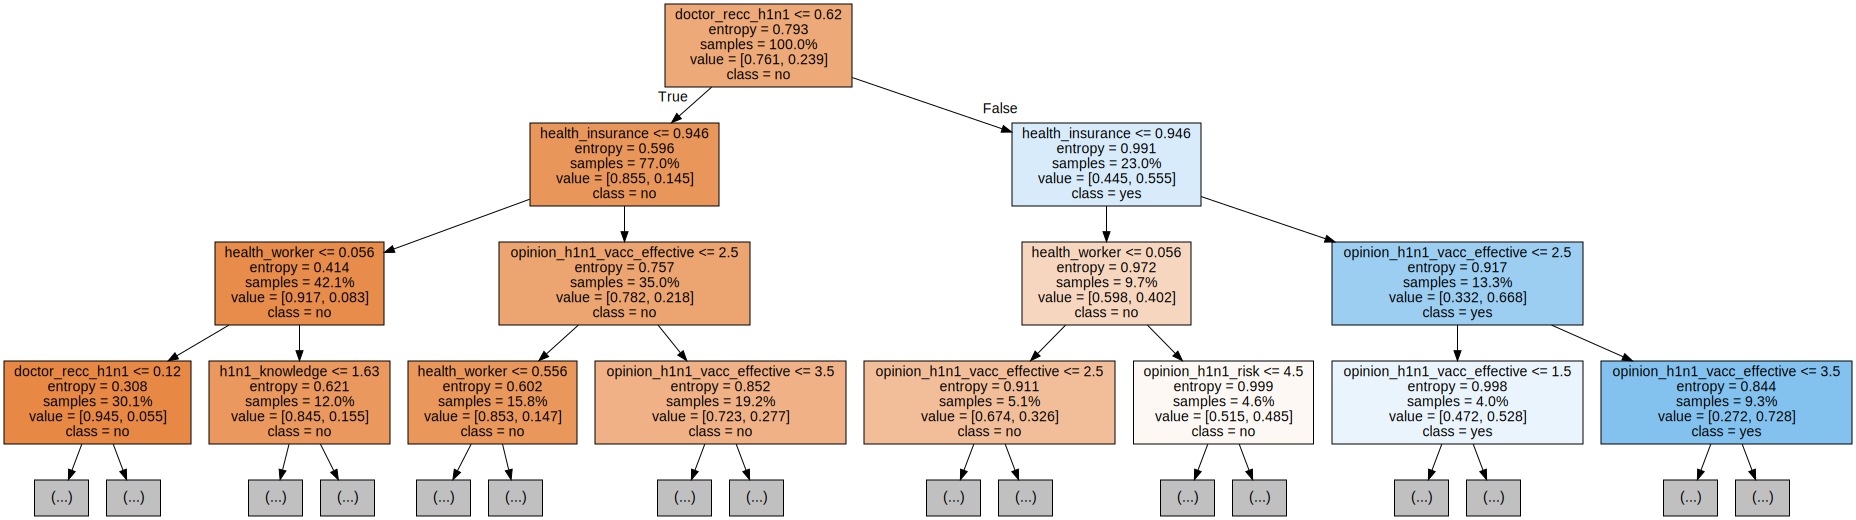

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# graphviz 설치방법: conda install -c conda-forge python-graphviz

# named_steps 속성을 사용해서 파이프라인의 각 스텝에 접근이 가능합니다.
# named_steps 은 유사 딕셔너리 객체(dictionary-like object)로 파이프라인 내 과정에 접근 가능하도록 합니다.
model_dt = pipe_dt.named_steps['decisiontreeclassifier']
enc = pipe_dt.named_steps['ordinalencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

2. 특성중요도
    - 각 특성이 얼마나 먼저, 자주 분기에 사용되었는지에 따라 특성중요도를 계산합니다.


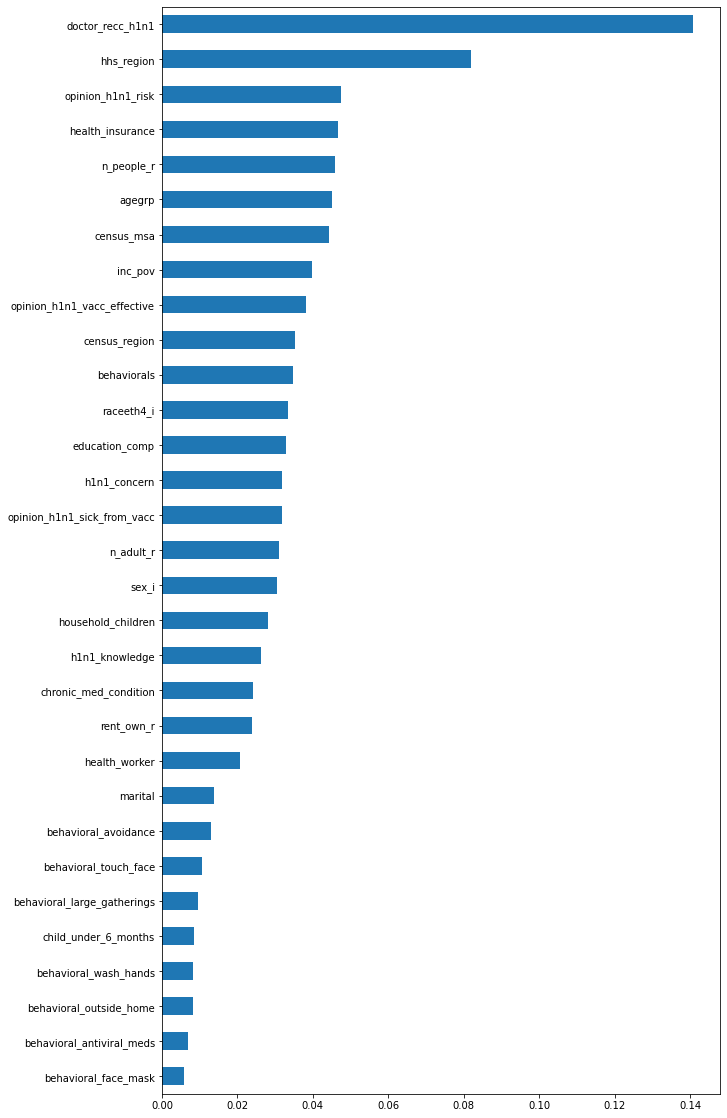

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

importances = pd.Series(model_dt.feature_importances_, X_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh();

#### 결정트리 과적합 해소

위에서 결정트리는 과적합이 잘 일어날 수 있는 모델이라고 설명했습니다.
- 우리가 만든 모델 역시 학습데이터는 99% 이상 맞추면서 검증세트의 정확도는 기준모델의 정확도(0.761)보다 낮게 나온 것을 확인할 수 있습니다.

> 그렇다면 어떻게 과적합을 해소할 수 있을까요?

하이퍼파라미터를 사용하여 트리의 복잡도를 줄일 수 있습니다.
- 트리의 복잡도를 줄이기 위해 많이 사용되는 하이퍼파라미터입니다.
    - min_samples_split
    - min_samples_leaf
    - max_depth
    
    [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)에서 더 많은 하이퍼파라미터를 알아보세요!

In [ ]:
# max_depth는 None이 default입니다. 즉, 마지막까지 분기한다는 뜻입니다.
# 과적합을 줄이기 위해 max_depth를 6으로 줬습니다.

pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=1, criterion="entropy", max_depth=6),
)
pipe_dt.fit(X_train, y_train)

print("훈련 정확도: ", pipe_dt.score(X_train, y_train))
print("검증 정확도: ", pipe_dt.score(X_val, y_val))

y_pred = pipe_dt.predict(X_test)

훈련 정확도:  0.8202413782878154
검증 정확도:  0.8231526509310877


max depth 조정 후 과적합이 해소되어 훈련 정확도가 0.99에서 0.82로 떨어졌고 검증 정확도는 0.74에서 0.82로 올라간 것을 확인할 수 있습니다.

#### 결정트리 vs 선형모델

결정트리모델은 선형모델과 달리 
1. 비선형, 비단조(non-monotonic), 특성상호작용(feature interactions) 특징을 가지고 있는 데이터 분석에 용의합니다.  
    
    <br></br>
    
    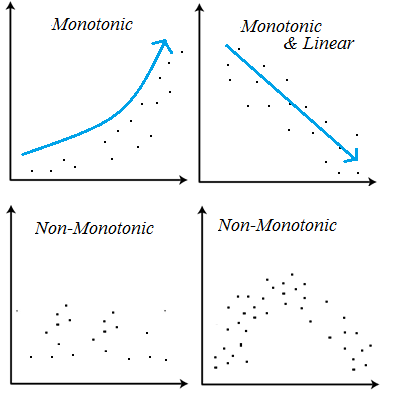

    - 단조(Monotonic), 비단조(Non-monotonic) 함수
        - [Monotonic function](https://en.wikipedia.org/wiki/Monotonic_function)
        - 데이터가 선형이라면 결정트리보다 선형모델이 더 적합하겠죠?

    - 특성상호작용
        - 특성상호작용은 특성들끼리 서로 상호작용을 하는 경우를 말합니다. 회귀분석에서는 서로 상호작용이 높은 특성들이 있으면 개별 계수를 해석하는데 어려움이 있고 학습이 올바르게 되지 않을 수 있습니다. 
        - 트리모델은 특성 간 상호작용이 없어야 한다는 가정이 없으며 분기하는 과정에서 자연스럽게 특성 간 상호작용을 포착할 수 있습니다.
<br></br>

2. 외삽이 어렵습니다.
  - 시간의 흐름에 따라 변하는 트렌드를 알고싶을 때는 트리베이스모델은 적절하지 않은 모델이다.
> 데이터의 패턴과 상황에 맞게 알맞은 알고리즘을 사용해야합니다.

## 2. 랜덤포레스트(RandomForest)

위에서 결정트리는 다음과 같은 단점이 있다고 언급했습니다.
- 결정트리는 훈련 데이터에 대한 제약 사항이 거의 없는 유연한 모델이기 때문에 과적합 될 위험이 있습니다. (선형회귀에서는 독립변수와 종속변수 간 선형성, 독립변수끼리의 독립성 등의 가정이 있지만)
- 결정트리는 작은 데이터 변동으로도 다른 트리가 생성될 수 있기 때문에 불안정할 수 있습니다.
- 한개의 트리만을 사용하기 때문에 한 노드에서 생긴 에러가 하부 노드에 계속 영향을 준다.

이러한 문제는 **앙상블 기법** 중 **배깅-bagging**을 대표하는 모델인 랜덤포레스트를 사용하면 쉽게 해결할 수 있습니다.

### 배깅(Bagging, `B`ootstrap `Agg`regat`ing`)

<img src="https://i.ibb.co/9qgwfq9/image.png" alt="image" border="0" width = '150%'>

<br>

- 배깅은 훈련 데이터에서 무작위로 복원 추출한 샘플로 여러 기본 모델을 만들어 각 개별 모델의 예측 결과를 종합하여 최종 예측을 하는 방법입니다.
- 이런 방법은 예측을 하는 과정에서 **`랜덤성`**을 부여하고 랜덤하게 만들어진 기본 모델을 종합하면서 분산을 줄여 과적합을 피할 수 있게 합니다.

#### 부트스트랩(Bootstrap) 샘플링
- 앙상블에 사용하는 기본 모델들은 부트스트래핑(bootstraping)이라는 샘플링 과정으로 얻은 **부트스트랩세트**를 사용해 학습을 합니다. 
    - 앙상블 기본 모델 = weak base learner
    - 앙상블: 여러 모델들의 결과를 참고하여 최종 타겟값을 결정하는 기법(e.g.bagging, boosting)
    - 원본 데이터에서 샘플링을 할 때 **복원추출**을 한다는 것인데 복원추출은 샘플을 뽑아 값을 기록하고 제자리에 돌려놓는 것을 말합니다. 이렇게 샘플링을 특정한 수만큼 반복하면 하나의 부트스트랩세트가 완성됩니다. 
    - 복원추출이기 때문에 부트스트랩세트에는 같은 샘플이 반복될 수 있습니다.
    <br></br>

    <img src="https://i.imgur.com/fg6gQES.png" width="700" />

In [ ]:
# 각각의 bootstrap마다 기본 모델을 만든다.

In [ ]:
# bagging 의 원리
# 랜덤복원추출을 사용하여 여러 기본모델들을 만든 후 각각의 기본들의 결과를 회귀에서는 평균, 분류에서는 다수결의 방법을 사용하여 최종 타겟값을 결정한다.

- Out-of Bag Samples(oob sample)

  - oob sample은 부트스트랩 과정에서 한번도 추출되지 않은 샘플을 의미합니다.
  - 데이터가 충분히 크다고 가정했을 때 한 부트스트랩세트는 **표본의 63.2%** 에 해당하는 샘플을 가집니다.
  - 여기서 추출되지 않는 36.8%의 샘플이 **Out-Of-Bag** 샘플이며 이것을 사용해 모델을 검증할 수 있습니다.
  - 추론 과정 $ $

    $\displaystyle \frac {n-1}{n}$ : 부트스트랩세트의 크기가 n이라 할 때 한 번의 추출과정에서 어떤 한 샘플이 추출 되지 않을 확률

    $\displaystyle \left({\frac {n-1}{n}}\right)^{n}$ : n회 복원추출을 진행했을 때 그 샘플이 추출되지 않았을 확률

    n을 무한히 크게 했을 때 : $\displaystyle \lim _{{n\to \infty }}\left({1 - \frac {1}{n}}\right)^{n} = e^{-1} = 0.368$

    참고 : $\displaystyle e =  \lim _{{n\to \infty }}\left(1+{\frac  {1}{n}}\right)^{n}$



#### Aggregation
부트스트랩세트로 만들어진 기본모델들을 합치는 과정을 **Aggregation** 이라고 합니다. 

- 회귀문제일 경우 기본모델 결과들의 **평균**으로 예측값을 내고, 

- 분류문제일 경우 **다수결**로 가장 많은 모델들이 선택한 범주로 예측합니다.

### RandomForest


- 랜덤포레스트는 결정트리를 기본모델로 사용하는 앙상블 기법입니다.
- 기본모델인 결정트리들은 **독립적**으로 만들어지며 각각의 기본모델이 랜덤으로 예측하는 성능보다 좋을 경우 이 기본모델을 합치는 과정에서 에러가 상쇄되어 랜덤포레스트는 더 정확한 예측을 할 수 있습니다.
- 랜덤포레스트는 두 가지 랜덤성을 갖고 있습니다.
  - 랜덤포레스트에서 학습되는 트리들은 배깅을 통해 만들어집니다.(`bootstrap = true`) 이때 각 기본모델에 사용되는 데이터가 랜덤으로 선택됩니다.
  - 랜덤포레스트의 기본 모델들은 노드를 분할할 때 **특성 n개 중 일부분 k개의 특성을 랜덤하게 선택(sampling)** 하여 이 안에서 최적의 특성을 찾아내어 분할합니다. $ $
    - 이때 k개는 일반적으로 $log_2 n$ 을 사용합니다.



sklearn을 통해 RandomForest를 구현해보겠습니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

훈련 정확도:  0.9908667674880646
검증 정확도:  0.8243387498517376


In [ ]:
# out-of-bag sample을 이용하여 oob_score를 구할 수 있습니다.
pipe_rf.named_steps["randomforestclassifier"].oob_score_

0.8133618005515524

여전히 과적합이 된 상태지만 결정트리보다 과적합이 완화된 것을 확인할 수 있습니다.  
하이퍼파라미터를 조정하여 과적합을 해소할 수 있습니다.

#### RandomForest의 주요 하이퍼파라미터

[randomforestclassfier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier)
- 결정트리를 기본모델로 하기 때문에 과적합을 해소하기 위한 하이퍼파라미터는 동일합니다.
    - max_depth
    - min_samples_split
    - min_samples_leaf
- 아래 하이퍼파라미터는 랜덤포레스트에만 있는 것들입니다.
    - n_estimators : 기본 모델의 수
    - max_features : 분할에 사용되는 최대 특성의 수
    - oob_score : oob sample을 이용한 검증 스코어 반환 여부

In [ ]:
# max_depth를 사용해서 과적합을 해소해보겠습니다.

pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(max_depth = 10, random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

훈련 정확도:  0.8454170744002609
검증 정확도:  0.8282528762898825


In [ ]:
pipe_rf.named_steps["randomforestclassifier"].oob_score_

0.8204192984016843

In [ ]:
y_pred = pipe_rf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      6416
           1       0.77      0.40      0.53      2015

    accuracy                           0.83      8431
   macro avg       0.80      0.68      0.71      8431
weighted avg       0.82      0.83      0.81      8431



#### 특성중요도
- 랜덤포레스트에서도 특성중요도를 확인할 수 있습니다.

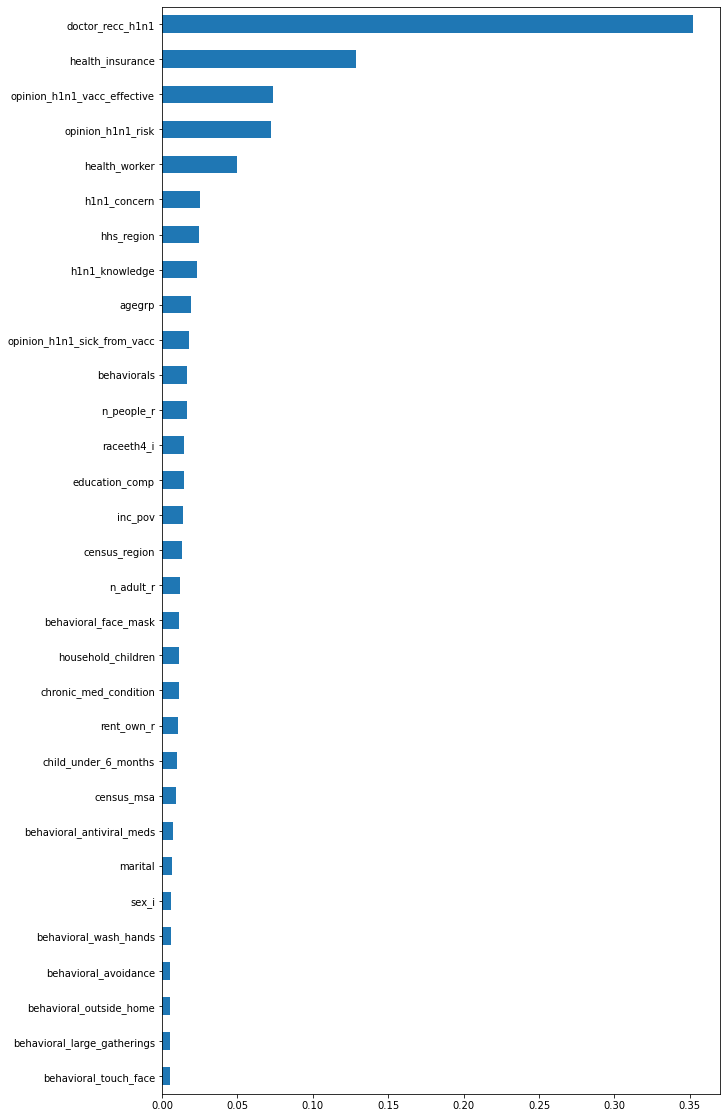

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

model_rf = pipe_rf.named_steps['randomforestclassifier']
importances = pd.Series(model_rf.feature_importances_, X_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh();

#### RandomForest Regressor
- 회귀트리를 그려보겠습니다.
- 결정트리와 랜덤포레스트가 비선형 관계에 적합하는 모습을 살펴보세요.

사용한 데이터 : [Thurber dataset](https://www.itl.nist.gov/div898/strd/nls/data/thurber.shtml) (Nonlinear Least Squares Regression)

In [ ]:
columns = ["mobility", "density"]
data = [
    [80.574, -3.067],
    [84.248, -2.981],
    [87.264, -2.921],
    [87.195, -2.912],
    [89.076, -2.84],
    [89.608, -2.797],
    [89.868, -2.702],
    [90.101, -2.699],
    [92.405, -2.633],
    [95.854, -2.481],
    [100.696, -2.363],
    [101.06, -2.322],
    [401.672, -1.501],
    [390.724, -1.46],
    [567.534, -1.274],
    [635.316, -1.212],
    [733.054, -1.1],
    [759.087, -1.046],
    [894.206, -0.915],
    [990.785, -0.714],
    [1090.109, -0.566],
    [1080.914, -0.545],
    [1122.643, -0.4],
    [1178.351, -0.309],
    [1260.531, -0.109],
    [1273.514, -0.103],
    [1288.339, 0.01],
    [1327.543, 0.119],
    [1353.863, 0.377],
    [1414.509, 0.79],
    [1425.208, 0.963],
    [1421.384, 1.006],
    [1442.962, 1.115],
    [1464.35, 1.572],
    [1468.705, 1.841],
    [1447.894, 2.047],
    [1457.628, 2.2],
]

thurber = pd.DataFrame(columns=columns, data=data)
X_thurber = thurber[["mobility"]]
y_thurber = thurber["density"]

In [ ]:
%matplotlib inline

from ipywidgets import interact
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


def trees(max_depth=1, n_estimators=1):
    models = [
        DecisionTreeRegressor(max_depth=max_depth),
        RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators),
    ]

    for model in models:
        name = model.__class__.__name__
        model.fit(X_thurber, y_thurber)
        ax = thurber.plot("mobility", "density", kind="scatter", title=name)
        ax.step(X_thurber.iloc[:,0], model.predict(X_thurber), where="mid")
        
        plt.show()


interact(trees, max_depth=(1, 10, 1), n_estimators=(10, 50, 10));

interactive(children=(IntSlider(value=1, description='max_depth', max=10, min=1), IntSlider(value=10, descript…

### 랜덤포레스트 알고리즘을 확인해 봅시다.

랜덤포레스트의 의사코드(Pseudo code)는 다음과 같습니다.

<img src="https://i.imgur.com/OSJWosw.png" width="700" />

## 👏 마무리
#### 이번 노트에서는 
- 결정트리 알고리즘이 학습하는 과정에 대해 배웠습니다.
- tree-based model과 선형회귀모델의 차이점에 대해 배웠습니다.
- 결정트리를 시각화하거나 특성중요도를 보고 모델을 해석할 수 있었습니다. 
- 여러 기본 모델을 종합하여 결과를 내는 앙상블 기법 중 **배깅** 과 배깅의 가장 대표적인 알고리즘인 **랜덤포레스트** 모델에 대해서 배웠습니다.
<br></br>

#### 학습 후 아래 질문에 답해보세요.

1. 결정트리는 어떻게 데이터를 학습하는 알고리즘인가요? 
2. 트리 앙상블 모델이 결정트리모델보다 상대적으로 과적합을 피할 수 있는 이유가 무엇일까요?
3. tree based model에서 onehotencoder가 아닌 ordinalencoder를 사용하는 이유는 무엇일까요?
4. tree based model과 선형모델의 차이점은 무엇인가요?


## 참고자료
- (예측모델 성능 비교 논문) [Data-driven advice for applying machine learning to bioinformatics problems](https://arxiv.org/abs/1708.05070)
- [MACHINE LEARNING LECTURE 8: ENSEMBLE METHODS](https://vdocuments.mx/machine-learning-lecture-8-ensemble-methods.html)
- [Random Forests Algorithm](http://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/ensembles/RandomForests.pdf)
- [Testing Variable Importance in Random Forests](https://eeecon.uibk.ac.at/~zeileis/papers/Lifestat-2008.pdf)
- [One-Hot Encoding is making your Tree-Based Ensembles worse, here’s why?](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)